In [4]:
from sklearn.datasets import load_wine
import pandas as pd

df = load_wine(as_frame=True)
df = df.frame
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
X = df.drop('target', axis=1)
y = df['target']

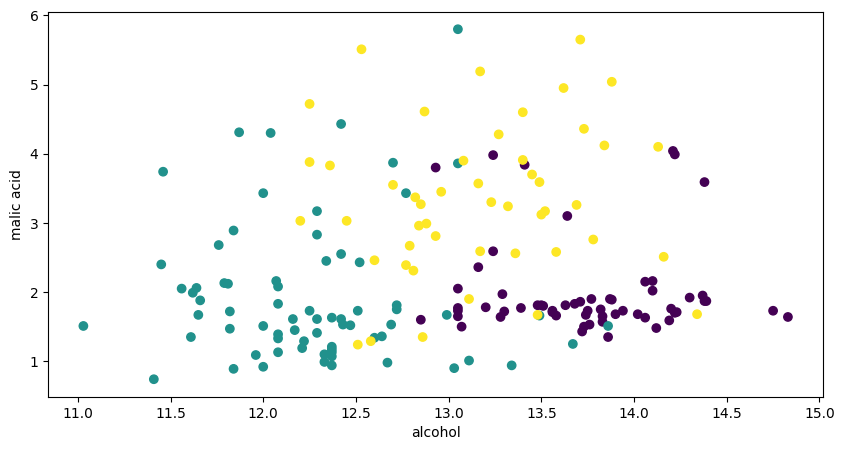

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(X['alcohol'], X['malic_acid'], c=y)
plt.xlabel("alcohol")
plt.ylabel("malic acid")
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
import numpy as np
cov_matrix = np.cov(X, rowvar=False)
cov_matrix

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

In [16]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
eigenvectors

array([[-0.01496997,  0.26628645,  0.22591696,  0.21160473,  0.50861912,
        -0.39613926,  0.05639636, -0.21353865, -0.26566365,  0.0178563 ,
        -0.20738262, -0.48365155, -0.1443294 ],
       [-0.02596375, -0.12169604, -0.07648554, -0.30907994, -0.07528304,
        -0.06582674, -0.42052391, -0.53681385,  0.03521363, -0.53689028,
         0.08901289, -0.22493093,  0.24518758],
       [ 0.14121803,  0.04962237,  0.49869142, -0.02712539, -0.30769445,
         0.17026002,  0.14917061, -0.15447466, -0.14302547,  0.21417556,
         0.6262239 , -0.31606881,  0.00205106],
       [-0.09168285,  0.05574287, -0.47931378,  0.05279942,  0.20044931,
        -0.42797018,  0.28696914,  0.10082451,  0.06610294, -0.06085941,
         0.61208035,  0.0105905 ,  0.23932041],
       [-0.05677422, -0.06222011, -0.07128891,  0.06787022,  0.27140257,
         0.15636143, -0.3228833 , -0.03814394,  0.72704851,  0.35179658,
         0.13075693, -0.299634  , -0.14199204],
       [ 0.46390791,  0.303882

In [18]:
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:,sorted_index]
sorted_eigenvectors

array([[-0.1443294 , -0.48365155, -0.20738262,  0.0178563 , -0.26566365,
        -0.21353865,  0.05639636, -0.39613926,  0.50861912,  0.21160473,
         0.22591696,  0.26628645, -0.01496997],
       [ 0.24518758, -0.22493093,  0.08901289, -0.53689028,  0.03521363,
        -0.53681385, -0.42052391, -0.06582674, -0.07528304, -0.30907994,
        -0.07648554, -0.12169604, -0.02596375],
       [ 0.00205106, -0.31606881,  0.6262239 ,  0.21417556, -0.14302547,
        -0.15447466,  0.14917061,  0.17026002, -0.30769445, -0.02712539,
         0.49869142,  0.04962237,  0.14121803],
       [ 0.23932041,  0.0105905 ,  0.61208035, -0.06085941,  0.06610294,
         0.10082451,  0.28696914, -0.42797018,  0.20044931,  0.05279942,
        -0.47931378,  0.05574287, -0.09168285],
       [-0.14199204, -0.299634  ,  0.13075693,  0.35179658,  0.72704851,
        -0.03814394, -0.3228833 ,  0.15636143,  0.27140257,  0.06787022,
        -0.07128891, -0.06222011, -0.05677422],
       [-0.39466085, -0.065039

In [19]:
n_components = 2
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
eigenvector_subset

array([[-0.1443294 , -0.48365155],
       [ 0.24518758, -0.22493093],
       [ 0.00205106, -0.31606881],
       [ 0.23932041,  0.0105905 ],
       [-0.14199204, -0.299634  ],
       [-0.39466085, -0.06503951],
       [-0.4229343 ,  0.00335981],
       [ 0.2985331 , -0.02877949],
       [-0.31342949, -0.03930172],
       [ 0.0886167 , -0.52999567],
       [-0.29671456,  0.27923515],
       [-0.37616741,  0.16449619],
       [-0.28675223, -0.36490283]])

In [28]:
X_reduced = np.dot(eigenvector_subset.transpose(),X.transpose()).transpose()
X_reduced

array([[-3.31675081, -1.44346263],
       [-2.20946492,  0.33339289],
       [-2.51674015, -1.0311513 ],
       [-3.75706561, -2.75637191],
       [-1.00890849, -0.86983082],
       [-3.05025392, -2.12240111],
       [-2.44908967, -1.17485013],
       [-2.05943687, -1.60896307],
       [-2.5108743 , -0.91807096],
       [-2.75362819, -0.78943767],
       [-3.47973668, -1.30233324],
       [-1.7547529 , -0.61197723],
       [-2.11346234, -0.67570634],
       [-3.45815682, -1.13062988],
       [-4.31278391, -2.09597558],
       [-2.3051882 , -1.66255173],
       [-2.17195527, -2.32730534],
       [-1.89897118, -1.63136888],
       [-3.54198508, -2.51834367],
       [-2.0845222 , -1.06113799],
       [-3.12440254, -0.78689711],
       [-1.08657007, -0.24174355],
       [-2.53522408,  0.09184062],
       [-1.64498834,  0.51627893],
       [-1.76157587,  0.31714893],
       [-0.9900791 , -0.94066734],
       [-1.77527763, -0.68617513],
       [-1.23542396,  0.08980704],
       [-2.18840633,

In [29]:
X_reduced.shape

(178, 2)

In [30]:
pca_df = pd.DataFrame(X_reduced, columns=[f'Principal Component {i+1}' for i in range(n_components)])
pca_df['Customer_Segment'] = y

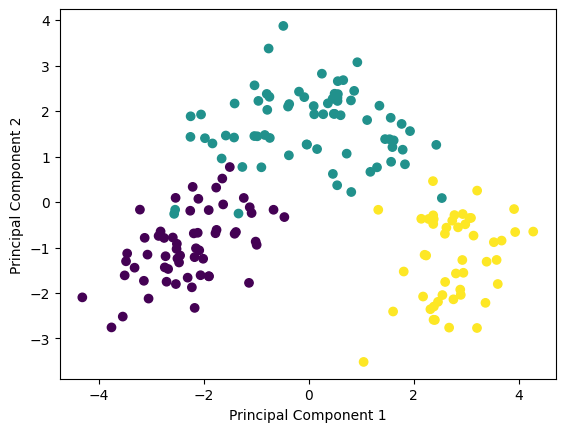

In [32]:
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Customer_Segment'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()